In [1]:
import pymatgen
import numpy as np
from pymatgen.ext.matproj import MPRester
import matplotlib.pyplot as plt
from pymatgen.phonon import plotter
from pymatgen.phonon import bandstructure

In [2]:
with MPRester("aeo5GUJ5RRpikp1p") as m:
    phonon   = m.get_phonon_bandstructure_by_material_id("mp-961706") 

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray




Plot de la dispersion des phonons et de la zone de brillouin du TiSiPt 

     DISPERSION DES PHONONS


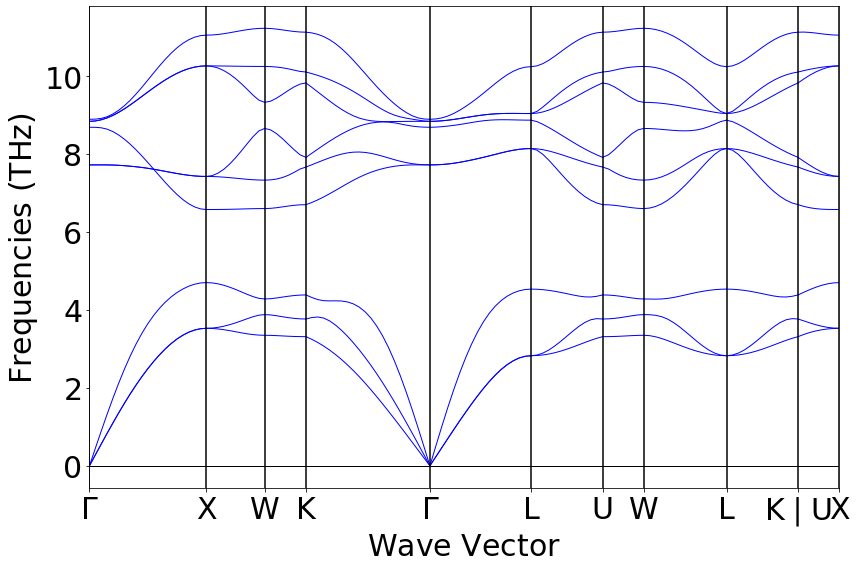

     ZONE DE BRILLOUIN


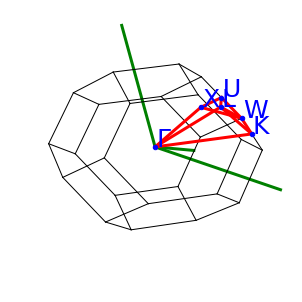

Ici, on va choisir arbitrairement 3 directions de la zone de brillouin et calculer les vitesses du son 
avec la relation v = 2*pi*|df/dq| donc en observant les pentes.
On choisit les directions  K-Γ, Γ-X et Γ-L.



In [3]:
print("======================================================================")
print("\nPlot de la dispersion des phonons et de la zone de brillouin du TiSiPt \n")
print("     DISPERSION DES PHONONS")
plot = plotter.PhononBSPlotter(phonon)
plot.bs_plot_data()
plot.show()
print("     ZONE DE BRILLOUIN")
plot.plot_brillouin()
print("Ici, on va choisir arbitrairement 3 directions de la zone de Brillouin et calculer les vitesses du son ") 
print("avec la relation v = 2*pi*|df/dq| donc en observant les pentes.") 
print("On choisit les directions  K-Γ, Γ-X et Γ-L.\n")
print("======================================================================")



In [13]:
print("======================================================================")
print("\nCALCUL DES VITESSES DU SON \n\n")
data = plot.bs_plot_data()
dist = data.get("distances")
freq = data.get("frequency")

slope1 = 2*np.pi * np.abs((freq[0][1][1] - freq[0][1][0]) / (dist[0][1]-dist[0][0]))
slope2 = 2*np.pi * np.abs((freq[3][0][-1] - freq[3][0][-2]) / (dist[3][-1]-dist[3][-2]))
slope3 = 2*np.pi * np.abs((freq[4][2][1] - freq[4][2][0]) / (dist[4][1]-dist[4][0]))

conversion_val = 10**2 #Car les fréquences sont en THz et les distances en Å = 10^-10 m

print("La vitesse du son de la branche acoustique dans la direction K-Γ vaut " + str(slope2*conversion_val) + " m/s \n")
print("La vitesse du son de la branche acoustique dans la direction Γ-X vaut " + str(slope1*conversion_val) + " m/s \n")
print("La vitesse du son de la branche acoustique dans la direction Γ-L vaut " + str(slope3*conversion_val) + " m/s \n")


CALCUL DES VITESSES DU SON 


La vitesse du son de la branche acoustique dans la direction K-Γ vaut 2335.319295113281 m/s 

La vitesse du son de la branche acoustique dans la direction Γ-X vaut 3244.0866990975555 m/s 

La vitesse du son de la branche acoustique dans la direction Γ-L vaut 5831.32584676982 m/s 



PLOT DES PENTES UTILISÉES POUR L'APPROXIMATION 




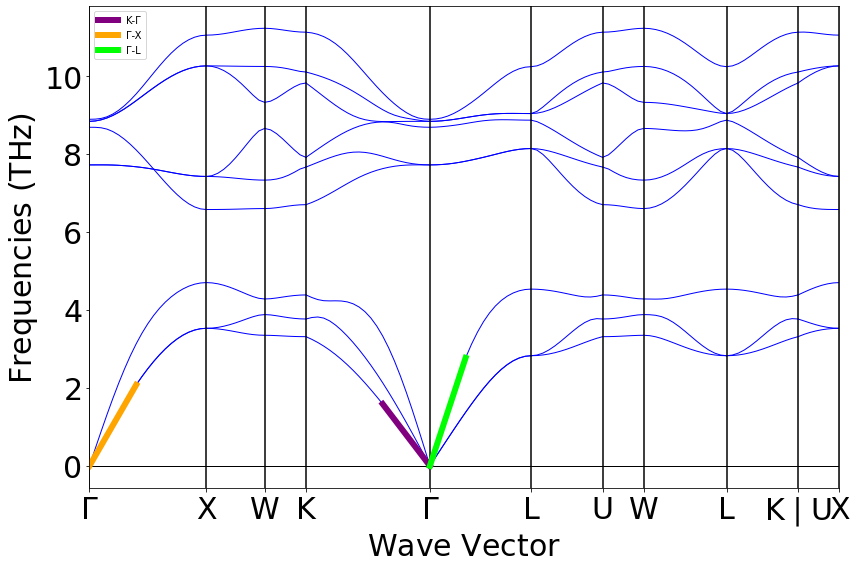

In [14]:
print("======================================================================")
print("PLOT DES PENTES UTILISÉES POUR L'APPROXIMATION \n\n")

plot.get_plot()
plt.plot([dist[3][13],dist[3][13]+dist[3][-1]-dist[3][13]],[freq[3][0][13],freq[3][0][13]+freq[3][0][-1]-freq[3][0][13]], color='purple', lw = 6, label = 'K-Γ')
plt.plot([dist[0][0],dist[0][0]+dist[0][8]-dist[0][0]],[freq[0][1][0],freq[0][1][0]+freq[0][1][8]-freq[0][1][0]], color='orange', lw = 6, label = 'Γ-X')
plt.plot([dist[4][0], dist[4][0]+dist[4][6]-dist[4][0]],[freq[4][2][0],freq[4][2][0]+freq[4][2][6]-freq[4][2][0]], color='lime', lw = 6, label = 'Γ-L')
plt.legend()

In [15]:
print("Les résultats observés sont cohérents car la branche acoustique dans la direction Γ-L a bien La vitesse")
print("du son de ainsi que la pente la plus élevée des 3 en valeur absolue. De même, la branche acoustique dans la ")
print("direction K-Γ a bien la pente et la vitesse du son la plus faible des 3 en valeur absolue.")

Les résultats observés sont cohérents car la branche acoustique dans la direction Γ-L a bien La vitesse
du son de ainsi que la pente la plus élevée des 3 en valeur absolue. De même, la branche acoustique dans la 
direction K-Γ a bien la pente et la vitesse du son la plus faible des 3 en valeur absolue.
